# First approach

- Models score when the shuffle param in train_test_split is True.
- Predictions and error plot for stacking model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model seletction results

This plot is about the models score generated with model_selection.py where the hyperparams are adjusted to optimize the results of each model.

In [245]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import std

# Dataset as a dataframe.
df = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21/df_results.csv', sep=",")
df = df[['Name','Score']]
df

,Name,Score
0,nnet,0.530577
1,lr,0.962455
2,dtr,0.456395
3,rf,0.429729
4,svm,0.761429
5,bayes,0.964600
6,knn,0.440417
7,gp,0.490849
8,sgd,0.983238
9,voting,0.415319


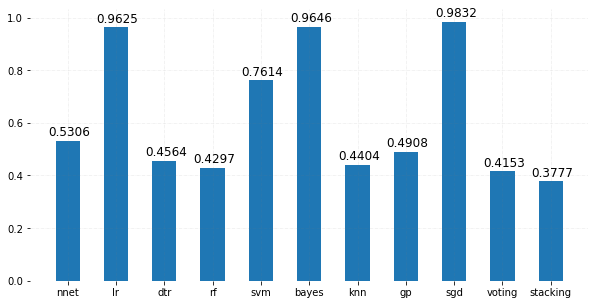

In [246]:
name = df['Name'].tolist()
score = df['Score'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (stacking model)

The next plots shown the execution of final_test.py for each model, where it can be seen the predictions and the error generated.

In [247]:
# Dataset as a dataframe.
df_stacking = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21/df_final_test_stacking.csv', sep=",")
df_stacking = df_stacking[['y_test','y_pred','reg_error']]
df_stacking

,y_test,y_pred,reg_error
0,0.7900,2.557073,-1.767073e+00
1,0.7900,0.790000,-1.110223e-15
2,0.7900,0.790000,-1.110223e-15
3,0.7900,0.891504,-1.015040e-01
4,0.7900,0.790000,-1.110223e-15
...,...,...,...
281,6.9270,6.920456,6.544160e-03
282,7.2282,6.170804,1.057396e+00
283,7.2890,6.891673,3.973265e-01
284,7.4400,6.872139,5.678609e-01


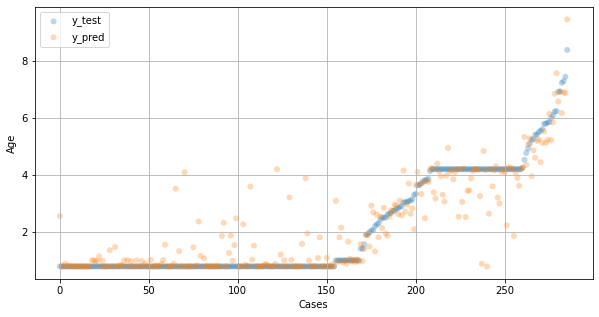

In [248]:
n = np.arange(df_stacking['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_stacking['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_stacking['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.set_xlabel('Cases')
ax.set_ylabel('Age')
ax.legend()
ax.grid(True)
plt.show()

In [249]:
# Selecting score
score = df.iloc[10,1]
y_std = std(score)

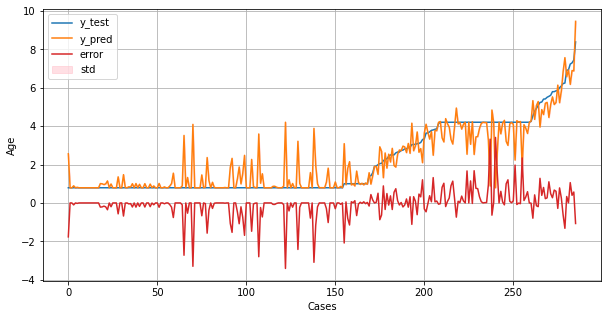

In [250]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_stacking['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_stacking['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_stacking['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_stacking['y_pred']-y_std, df_stacking['y_pred']+y_std,
                color="pink", alpha=0.5, label="std")
ax.set_xlabel('Cases')
ax.set_ylabel('Age')
ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test)

In [251]:
# Train and test datasets as one dataframe.
df_data = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21/df_data.csv', sep=",")
df_data = df_data[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


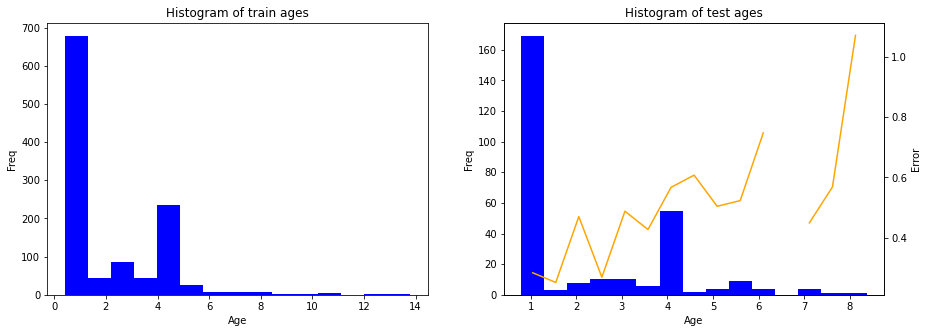

In [284]:
num_bins = 15

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data['y_test'], num_bins, density=False, color='blue')

# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_stacking[(df_stacking['y_test'] >= bins2[i])
                                    & (df_stacking['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_stacking[(df_stacking['y_test'] >= bins2[i])
                                    & (df_stacking['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3=ax2.twinx()
ax3.plot(aux,mean_error,color='orange')
ax3.set_ylabel('Error')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
plt.show()

In [271]:
# Next df shows the mean error for each bin

df_bins_error = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error

,Bin,Mean Error
0,1,0.283201
1,2,0.251083
2,3,0.469665
3,4,0.268370
4,5,0.487449
5,6,0.426662
6,7,0.566694
7,8,0.607192
8,9,0.503816
9,10,0.522744


# Next step

- Models score when the shuffle param in train_test_split is False.
- Predictions and error plot for neural network model (best score).
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [253]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','Score']]
df_nosh

,Name,Score
0,nnet,1.451547
1,lr,2.782399
2,dtr,1.572493
3,rf,1.686799
4,svm,2.782321
5,bayes,2.777276
6,knn,1.677838
7,gp,1.718486
8,sgd,3.799890
9,voting,1.666675


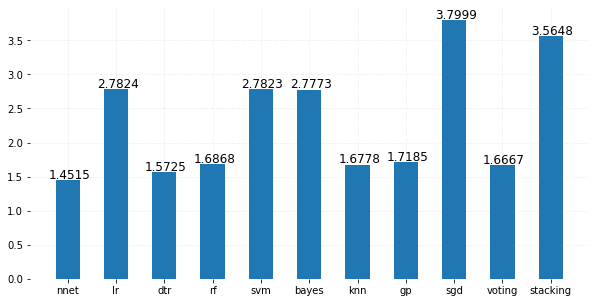

In [254]:
name = df_nosh['Name'].tolist()
score = df_nosh['Score'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (neural network model)

In [255]:
# Dataset as a dataframe.
df_nnet_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle/df_final_test_nnet.csv', sep=",")
df_nnet_nosh = df_nnet_nosh[['y_test','y_pred','reg_error']]
df_nnet_nosh

,y_test,y_pred,reg_error
0,4.20,2.934648,1.265352
1,4.20,3.878141,0.321859
2,4.20,2.044670,2.155330
3,4.20,3.888002,0.311998
4,4.20,4.635412,-0.435412
...,...,...,...
281,10.70,3.542815,7.157185
282,10.70,3.923579,6.776421
283,12.40,2.460664,9.939336
284,13.62,4.436807,9.183193


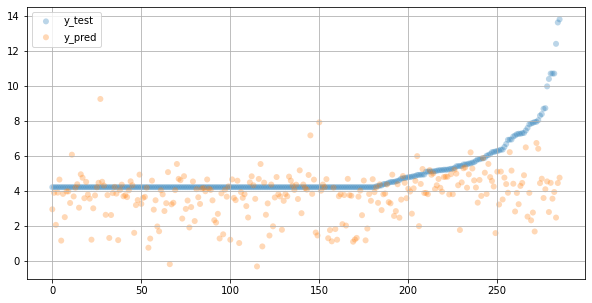

In [256]:
n = np.arange(df_nnet_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

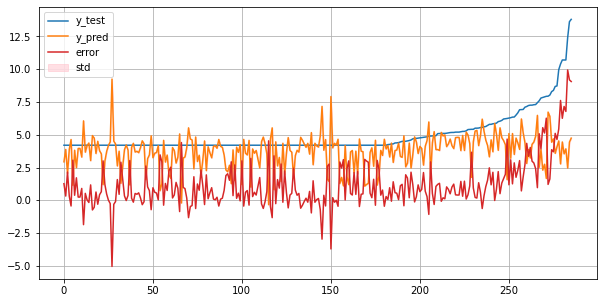

In [257]:
# Selecting score
score = df_nosh.iloc[0,1]
y_std_nosh = std(score)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_nnet_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_nnet_nosh['y_pred']-y_std_nosh, df_nnet_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [258]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


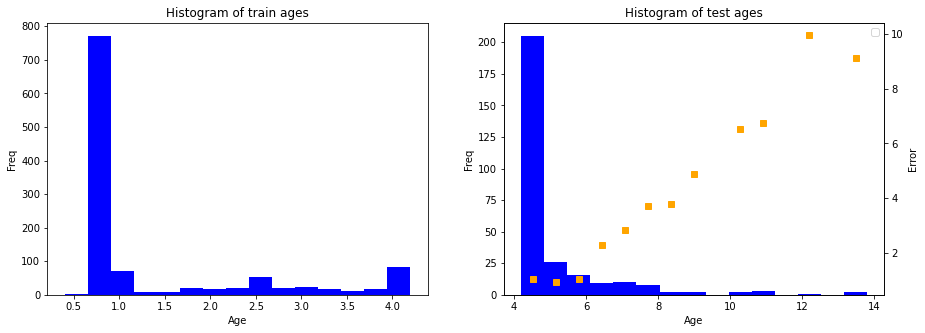

In [287]:
num_bins = 15

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3=ax2.twinx()
ax3.plot(aux,mean_error, 's', color='orange')
ax3.set_ylabel('Error')


ax2.legend()
ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
plt.show()

In [288]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,1.059511
1,2,0.924324
2,3,1.033911
3,4,2.301747
4,5,2.820226
5,6,3.716643
6,7,3.777719
7,8,4.871752
8,9,NaN
9,10,6.525469


# Without Shuffle 2.0

Last wihout-shuffle case has this age distribution (seen in the last histograms):
- Train set: from 0.4 to 4.2 (80% of the entire dataset)
- Test set: from 4.2 to 13.8 (20% of the entire dataset)

In this case, it's selected a diferent value range for each one:
- Train set: from 0.4 to 3.03 (70% of the entire dataset)
- Test set: from 3.04 to 13.8 (30% of the entire dataset)

This split allows to assign each one of two most populated age in differents sets (age 0.79 in train set and age 4.2 in test set)

### Model Selection Results without shuffle

In [289]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle_2_0/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','Score']]
df_nosh

,Name,Score
0,nnet,2.543706
1,lr,3.174805
2,dtr,2.749216
3,rf,2.739885
4,svm,3.616649
5,bayes,3.172744
6,knn,2.720618
7,gp,2.960918
8,sgd,3.587742
9,voting,2.761505


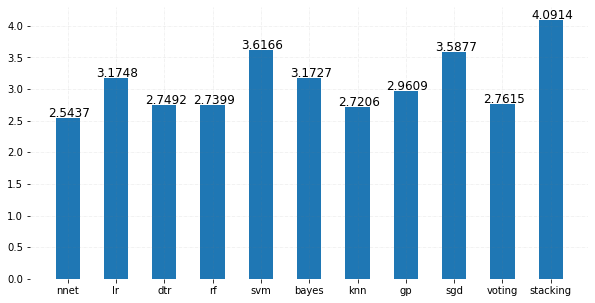

In [290]:
name = df_nosh['Name'].tolist()
score = df_nosh['Score'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.4, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
  
# Show Plot 
plt.show() 

### Final test plots (neural network model)

In [294]:
# Dataset as a dataframe.
df_nnet_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle_2_0/df_final_test_nnet.csv', sep=",")
df_nnet_nosh = df_nnet_nosh[['y_test','y_pred','reg_error']]
df_nnet_nosh

,y_test,y_pred,reg_error
0,3.041,2.577861,0.463139
1,3.052,2.421857,0.630143
2,3.054,1.664755,1.389245
3,3.072,1.005602,2.066398
4,3.084,3.230602,-0.146602
...,...,...,...
424,10.700,3.602396,7.097604
425,10.700,3.217681,7.482319
426,12.400,1.624561,10.775439
427,13.620,3.084671,10.535329


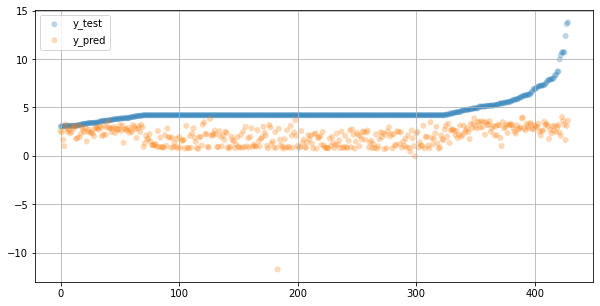

In [295]:
n = np.arange(df_nnet_nosh['y_pred'].size)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test',alpha=0.3, edgecolors='none')
ax.scatter(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred',alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

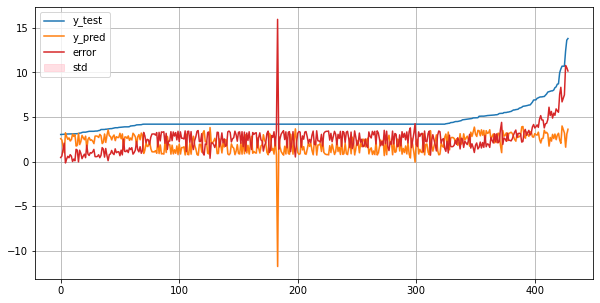

In [296]:
# Selecting score
score = df_nosh.iloc[0,1]
y_std_nosh = std(score)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(n, df_nnet_nosh['y_test'], c='tab:blue', label='y_test')
ax.plot(n, df_nnet_nosh['y_pred'], c='tab:orange', label='y_pred')
ax.plot(n, df_nnet_nosh['reg_error'], c='tab:red', label='error')

ax.fill_between(n, df_nnet_nosh['y_pred']-y_std_nosh, df_nnet_nosh['y_pred']+y_std_nosh,
                color="pink", alpha=0.5, label="std")

ax.legend()
ax.grid(True)
plt.show()

### Ages histogram (train and test, without shuffle)

In [297]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/AI4stellarage/results_12_2_21_no_shuffle_2_0/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


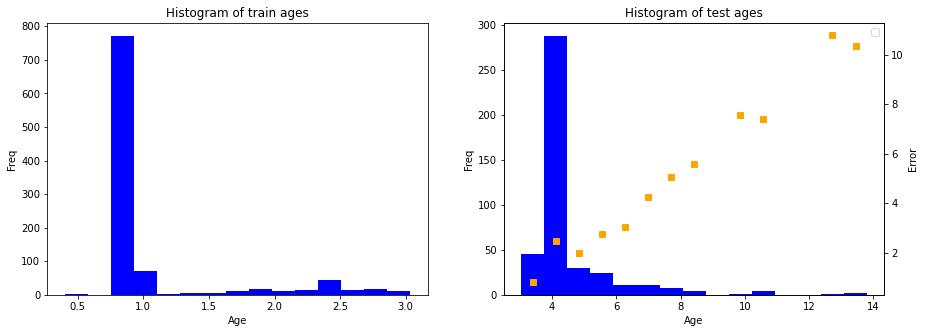

In [298]:
num_bins = 15

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh[(df_nnet_nosh['y_test'] >= bins2[i])
                                    & (df_nnet_nosh['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3=ax2.twinx()
ax3.plot(aux,mean_error, 's', color='orange')
ax3.set_ylabel('Error')


ax2.legend()
ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
plt.show()

In [299]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,0.799701
1,2,2.492514
2,3,1.995378
3,4,2.742935
4,5,3.052885
5,6,4.245565
6,7,5.057445
7,8,5.586671
8,9,NaN
9,10,7.553719
